In [13]:
import math
import torchdiffeq
from numpy import sin, linspace
import torch
import numpy as np
import matplotlib.pyplot as plt
import torchdiffeq
from scipy.integrate import solve_ivp, odeint

/Users/yuzheyang/anaconda3/envs/torch_env/lib/python3.9/site-packages/scipy/integrate/_ivp/common.py:39: UserWarning: The following arguments have no effect for a chosen solver: `metheod`.
  warn("The following arguments have no effect for a chosen solver: {}."


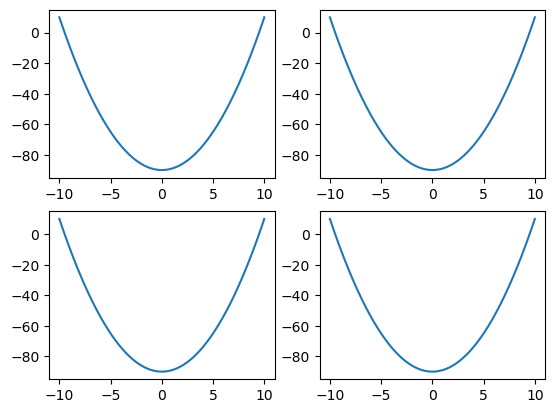

In [15]:
def f1(y, t):
    return 2*t


def f2(t, y):
    return 2*t


def solve_first_order_ode():
    t1 = linspace(-10, 10, 1000)
    y0 = [10]

    y1 = odeint(f1, y0, t1)
    y2 = odeint(f2, y0, t1, tfirst=True)
    y3 = solve_ivp(f2, (-10.0, 10.0), y0, metheod='LSODA', t_eval=t1)
    y4 = torchdiffeq.odeint(f2, torch.tensor(y0, dtype=torch.float32), torch.tensor(t1))

    plt.subplot(2, 2, 1)
    plt.plot(t1, y1)
    plt.subplot(2, 2, 2)
    plt.plot(t1, y2)
    plt.subplot(2, 2, 3)
    plt.plot(y3.t, y3.y[0])
    plt.subplot(2, 2, 4)
    plt.plot(t1, y4.numpy())
    plt.show()


solve_first_order_ode()

In [17]:
def fvdp1(t, y):
    return np.array([y[1], (1 - y[0] ** 2) * y[1] - y[0]])  # (一阶导，二阶导)


def solve_sencond_order_ode():
    t = np.linspace(0, 25, 101)
    y0 = [2, 0]
    y = odeint(fvdp1, y0, t)
    plt.plot(t, y)
    plt.show()


solve_sencond_order_ode()

TypeError: 'float' object is not subscriptable